In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of samples
num_samples = 5000  # Increase to create a larger dataset

# Generate random dates within a specific range
start_date = datetime(2010, 1, 1)
end_date = datetime(2023, 1, 1)
date_range = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(num_samples)]

# Define possible disaster types
disaster_types = ['Hurricane', 'Flood', 'Wildfire', 'Earthquake', 'Tornado']

# Generate synthetic data
data = {
    'Date': date_range,
    'Disaster_Type': [random.choice(disaster_types) for _ in range(num_samples)],
    'Temperature': np.random.uniform(15, 45, num_samples),  # Temperature between 15°C and 45°C
    'Wind_Speed': np.random.uniform(5, 250, num_samples),  # Wind speed between 5 and 250 km/h
    'Rainfall': np.random.uniform(0, 800, num_samples),  # Rainfall between 0 and 800 mm
    'Population_Density': np.random.randint(50, 3000, num_samples),  # Population density between 50 and 3000 people/km²
    'Infrastructure_Quality': [random.choice(['Low', 'Medium', 'High']) for _ in range(num_samples)],
    'Impact': np.random.uniform(100000, 10000000, num_samples)  # Economic damage between $100,000 and $10,000,000
}

# Create DataFrame
synthetic_large_data = pd.DataFrame(data)

# Save the larger synthetic dataset to a CSV file
synthetic_large_data.to_csv('synthetic_large_disaster_data.csv', index=False)

print("Synthetic dataset created and saved as 'synthetic_large_disaster_data.csv'.")


Synthetic dataset created and saved as 'synthetic_large_disaster_data.csv'.


In [ ]:
from google.colab import files

# Download the file
files.download('synthetic_large_disaster_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
pip install pandas scikit-learn joblib requests


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Step 1: Load the dataset
data = pd.read_csv('synthetic_large_disaster_data.csv')

# Step 2: Data Preprocessing
# Fill missing values if any
data.ffill(inplace=True)  # Use forward fill instead of deprecated fillna method

# Convert categorical features to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Disaster_Type', 'Infrastructure_Quality'], drop_first=True)

# Drop the 'Date' column
data.drop(['Date'], axis=1, inplace=True)

# Normalize numerical features (like climate-related data)
scaler = StandardScaler()
data[['Temperature', 'Wind_Speed', 'Rainfall', 'Population_Density']] = scaler.fit_transform(data[['Temperature', 'Wind_Speed', 'Rainfall', 'Population_Density']])

# Step 3: Separate features and target
X = data.drop(['Impact'], axis=1)  # Features
y = data['Impact']  # Target: economic damage

# Step 4: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Selection and Training: Random Forest Regressor
# Initialize the RandomForest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Step 8: Save the trained model
joblib.dump(model, 'disaster_impact_model.pkl')
print("Model saved as 'disaster_impact_model.pkl'.")


Mean Squared Error: 8805677443954.46
R-squared Score: -0.05
Model saved as 'disaster_impact_model.pkl'.


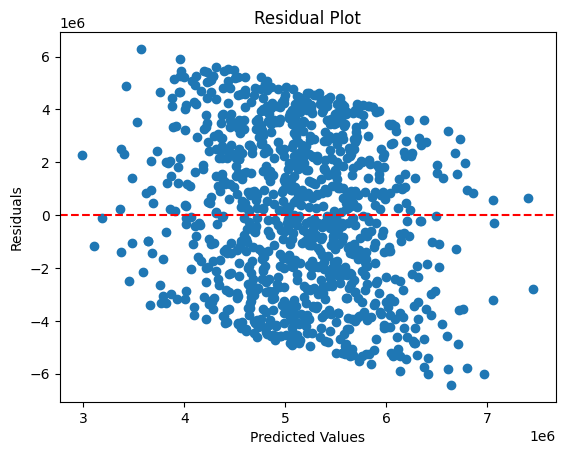

In [15]:
import matplotlib.pyplot as plt

# Residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


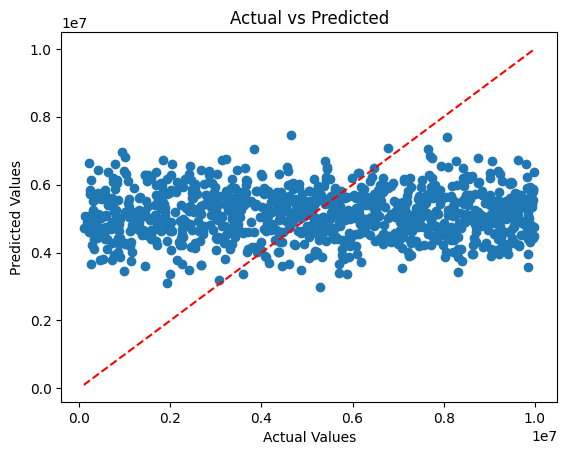

In [16]:
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()
